In [ ]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns #importing seaborn module 
import warnings
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import metrics
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import xgboost as xgb
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_8i3B3FC.csv to test_8i3B3FC.csv
Saving train_NIR5Yl1.csv to train_NIR5Yl1.csv


In [ ]:
#Load train and test files 
data = pd.read_csv('train_NIR5Yl1.csv')
test = pd.read_csv('test_8i3B3FC.csv')

In [ ]:
#creating dataframe for the required output
submission = pd.DataFrame()
submission['ID'] = test['ID']

In [ ]:
##Step 1 : Explore train and test datasets

#First look at train
data.sample(5)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
99658,176402,x,7864,9,79919,34896,264
173196,247471,j,601,4,133713,38256,41
264785,100229,s,9,1,47269,10931,1
317536,114693,p,836,3,134665,1400,2
281409,453781,j,1979,3,37857,4064,18


In [ ]:
#First look at test
test.sample(5)

,ID,Tag,Reputation,Answers,Username,Views
21746,351615,r,5538,3,78433,1357
92832,75119,c,2658,3,100358,54846
77557,25764,c,2690,5,145819,58446
105788,69988,p,263,2,81928,1164
66360,410077,o,12017,2,127176,25646


In [ ]:
#Shape of train and test
print('There are {} rows and {} columns in train'.format(data.shape[0],data.shape[1]))
print('There are {} rows and {} columns in train'.format(test.shape[0],test.shape[1]))

There are 330045 rows and 7 columns in train
There are 141448 rows and 6 columns in train


In [ ]:
#Check Missing values in train
data.isna().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [ ]:
#Check Missing values in test
test.isna().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
dtype: int64

No missing data in train and test

In [ ]:
#Check data types in train
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          330045 non-null  int64 
 1   Tag         330045 non-null  object
 2   Reputation  330045 non-null  int64 
 3   Answers     330045 non-null  int64 
 4   Username    330045 non-null  int64 
 5   Views       330045 non-null  int64 
 6   Upvotes     330045 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 17.6+ MB


In [ ]:
#Check data types in test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141448 entries, 0 to 141447
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          141448 non-null  int64 
 1   Tag         141448 non-null  object
 2   Reputation  141448 non-null  int64 
 3   Answers     141448 non-null  int64 
 4   Username    141448 non-null  int64 
 5   Views       141448 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 6.5+ MB


In [ ]:
#Lets describe train
data.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [ ]:
#Lets describe test
test.describe()

,ID,Reputation,Answers,Username,Views
count,141448.000000,1.414480e+05,141448.000000,141448.000000,1.414480e+05
mean,235743.073497,7.920927e+03,3.914873,81348.231117,2.984633e+04
std,136269.867118,2.791072e+04,3.577460,49046.098215,8.034374e+04
min,7.000000,0.000000e+00,0.000000,4.000000,9.000000e+00
25%,117797.000000,2.860000e+02,2.000000,40222.750000,2.608000e+03
50%,235830.000000,1.245000e+03,3.000000,78795.500000,8.977000e+03
75%,353616.000000,5.123000e+03,5.000000,122149.000000,2.698925e+04
max,471488.000000,1.042428e+06,73.000000,175737.000000,5.004669e+06


In [ ]:
#Lets concatenate train & test
df=pd.concat([data,test])
df.shape 

(471493, 7)

In [ ]:
#Lets drop ID column
df.drop('ID', axis = 1, inplace = True)

Identify categorical and numerical columns

In [ ]:
#Identify categorical columns 
df_cat=df.select_dtypes(include='object')
list(df_cat.columns)

['Tag']

In [ ]:
#Identify numerical columns
df_num=df.select_dtypes(include=['int64','float64'])
list(df_num.columns)

['Reputation', 'Answers', 'Username', 'Views', 'Upvotes']

Step 1 : EDA (Exploratory Data Analysis)

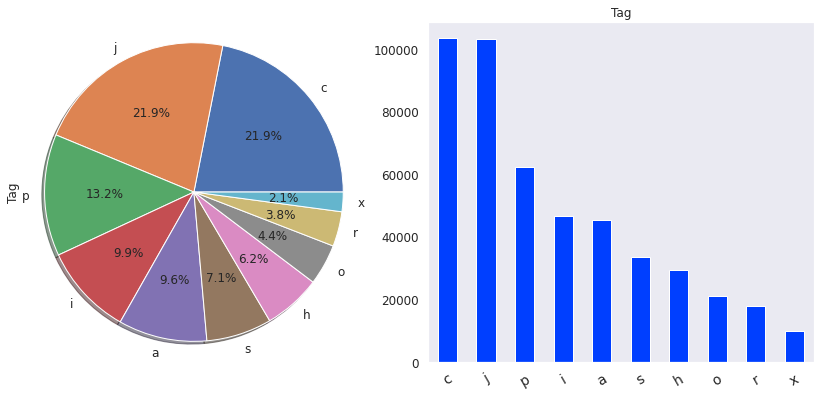

In [ ]:
#Explore categorical variables - Tag
count = 1
for cols in df_cat:
    plt.subplot(1, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.1,textprops={'fontsize': 12} )
    count +=1
    plt.subplot(1, 2, count)
    plt.tight_layout()
    plt.style.use('seaborn-bright')
    df[cols].value_counts().plot.bar()
    fig=plt.gcf()
    fig.set_size_inches(12,5)
    plt.title('{0}'.format(cols))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(rotation=30)
    count+=1

* Variable : Tag
    * c & j : Maximum count of 100000+ (21.9%)
    * x : Minimum count of 9k+

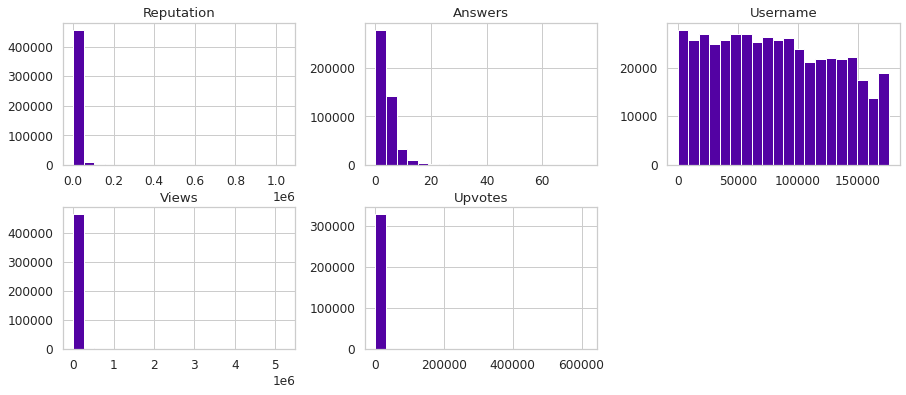

In [ ]:
#Explore numerical variables distribution
sns.set(style='whitegrid', palette="plasma", font_scale=1.1, rc={"figure.figsize": [8, 5]})
df[list(df_num.columns)].hist(bins=20, figsize=(15, 6), layout=(2, 3));

For username : Max frequency is from 0 to 100000

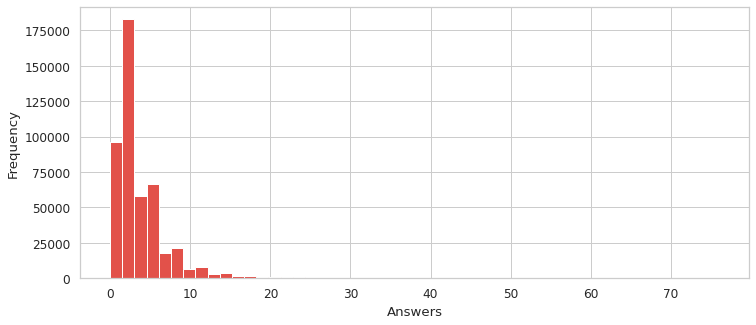

In [ ]:
#Lets explore numerical variables : Answers
sns.set(style='whitegrid', palette="Spectral", font_scale=1.1, rc={"figure.figsize": [12, 5]})
sns.distplot(
    df['Answers'], norm_hist=False, kde=False, bins=50, hist_kws={"alpha": 1}
).set(xlabel='Answers', ylabel='Frequency');


Answers: Max frequency for answer count = 1 to 2

In [ ]:
# Lets identify which tag is having lowest/highest median value with respect to the numerical variables 
for cols in df_num:
    sorted_nb = df.groupby(['Tag'])[cols].median().sort_values()
    print("Sort numerical value by",sorted_nb)    

Sort numerical value by Tag
r     699.0
s     906.0
x     916.5
h     973.0
a    1100.0
p    1122.0
i    1233.0
j    1378.0
o    1469.0
c    1637.0
Name: Reputation, dtype: float64
Sort numerical value by Tag
r    2
x    2
a    3
c    3
h    3
i    3
j    3
o    3
p    3
s    3
Name: Answers, dtype: int64
Sort numerical value by Tag
s    75445.0
c    76778.0
i    76843.0
o    77316.5
a    78932.0
x    79101.5
h    79329.0
j    79705.0
r    82472.0
p    83613.0
Name: Username, dtype: float64
Sort numerical value by Tag
r     2888.0
o     5025.5
x     5042.0
s     5693.0
i     6224.0
h     8113.5
c     8391.0
p    10412.5
a    12862.0
j    14541.0
Name: Views, dtype: float64
Sort numerical value by Tag
r    11.0
x    13.0
s    16.0
o    17.0
h    20.0
i    20.0
p    30.0
c    33.0
a    35.0
j    42.0
Name: Upvotes, dtype: float64


* Reputation : r(699) is min Vs C is max (1637)
* Answers  : Median is 2 for r&x Vs 3 for all others
* Username : It does not make any sense 
* Views    : r has min (2888) Vs j is max (14541) i.e. j tag has max views
* Upvotes : r has min (11) Vs j has max (42) median value

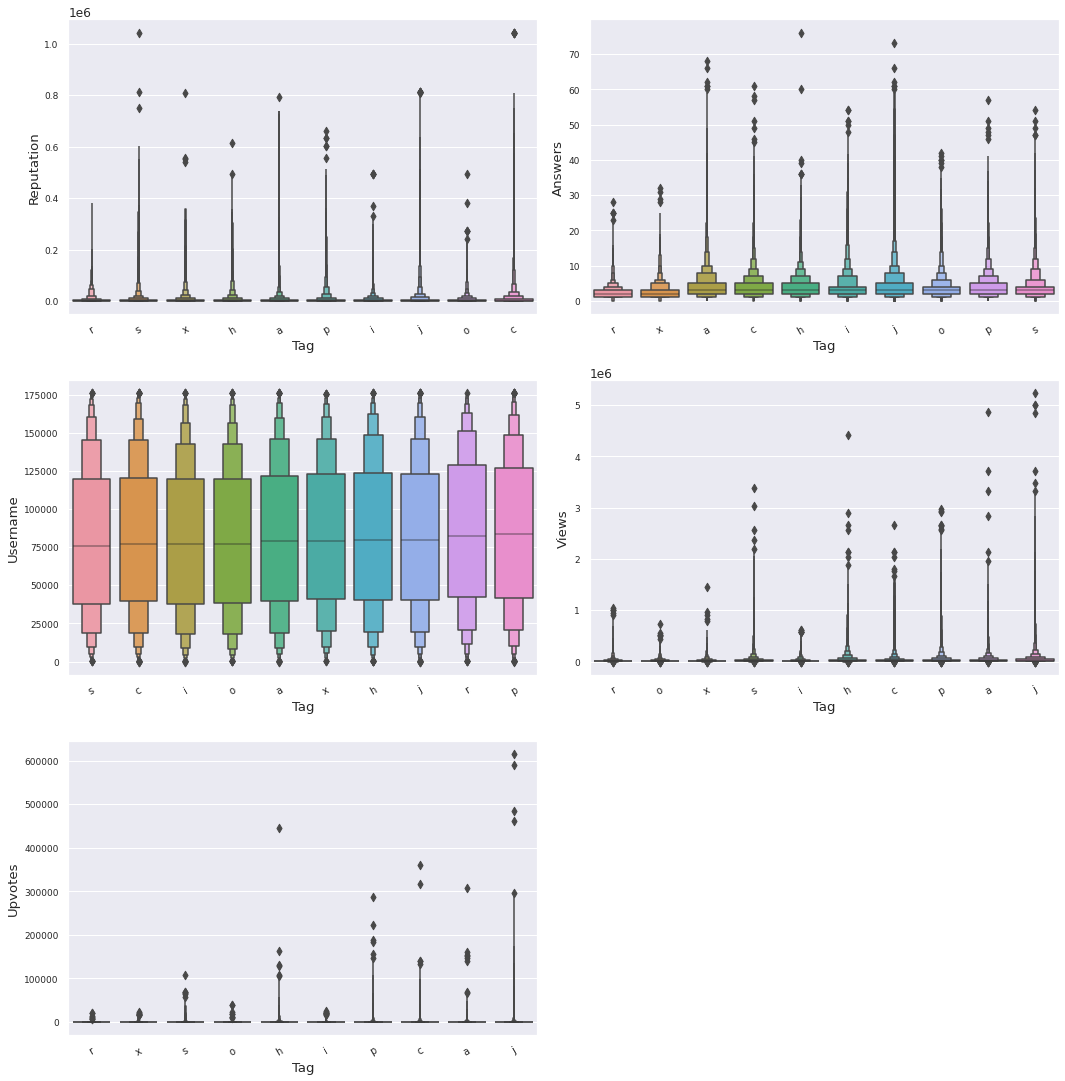

In [ ]:
#Lets visualize above details in boxen plot
#Numerical Data ['Reputation', 'Answers', 'Username', 'Views', 'Upvotes'] Vs Tag (i.e. categorical variable ) in ascending order of median 
plt.figure(figsize=(15, 15))
count = 1
for cols in df_num:
    sns.set(style='darkgrid', palette="Set1", font_scale=1.1, rc={"figure.figsize": [12, 12]})
    plt.subplot(3, 2, count)
    plt.tight_layout()
    sorted_nb = df.groupby(['Tag'])[cols].median().sort_values()
    sns.boxenplot(x=df['Tag'], y=df[cols], order=list(sorted_nb.index))
    plt.xticks(rotation=30)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=9)
    
    count+=1

Lets visualize regression plots between numerical variables Vs Target variable (i.e Upvotes)

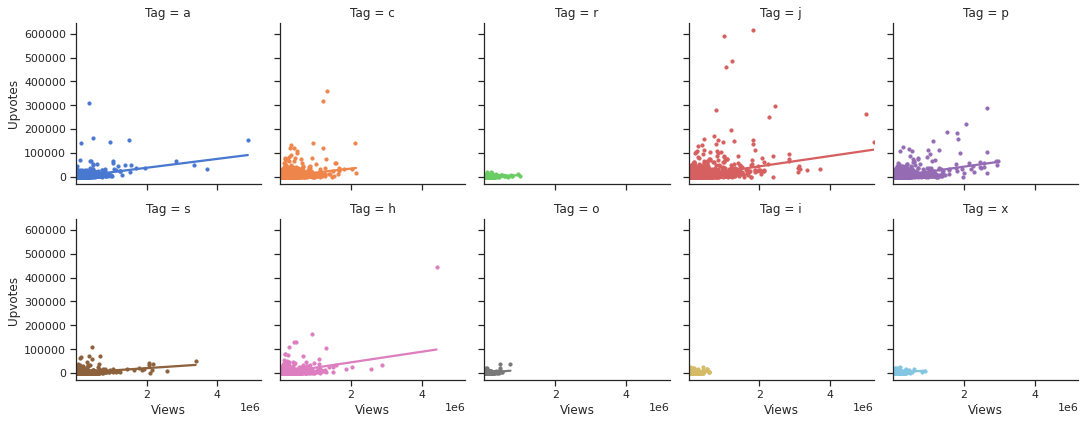

In [ ]:
#Correlation between Views and Upvotes across each tag
sns.set(font_scale=1.0,style="ticks")
sns.lmplot(x="Views",y="Upvotes",data=data, col="Tag", col_wrap=5, ci=None, palette="muted", hue="Tag" , height=3, scatter_kws={"s": 10, "alpha": 1})
plt.show()

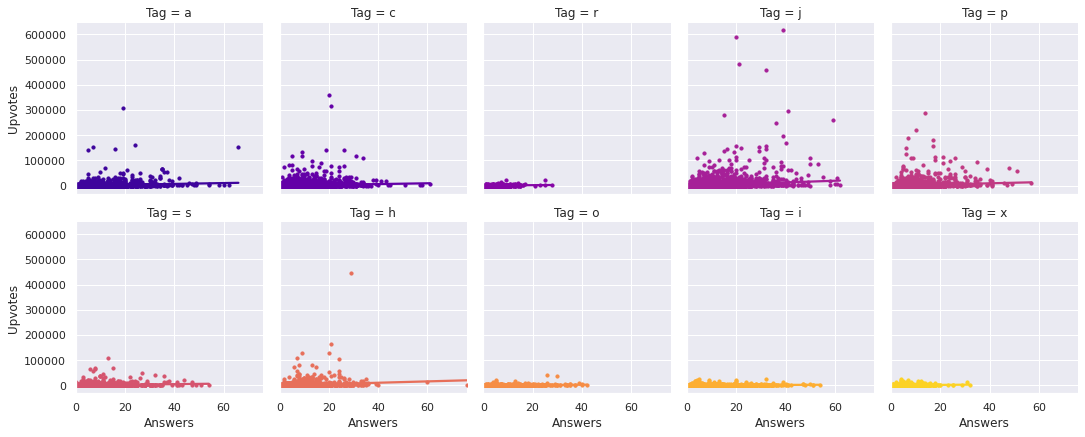

In [ ]:
#Correlation between Answers and Upvotes across each tag
sns.set(font_scale=1.0,style="darkgrid")
sns.lmplot(x="Answers",y="Upvotes",data=data, col="Tag", col_wrap=5, ci=None, palette="plasma", hue="Tag" , height=3, scatter_kws={"s": 10, "alpha": 1})
plt.show()

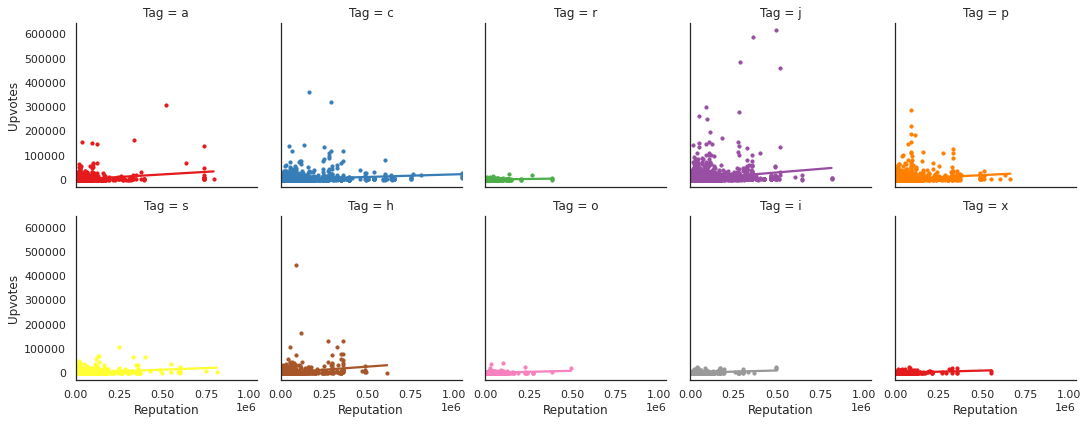

In [ ]:
#Correlation between Reputation and Upvotes across each tag
sns.set(font_scale=1.0,style="white")
sns.lmplot(x="Reputation",y="Upvotes",data=data, col="Tag", col_wrap=5, ci=None, palette="Set1", hue="Tag" , height=3, scatter_kws={"s": 10, "alpha": 1})
plt.show()

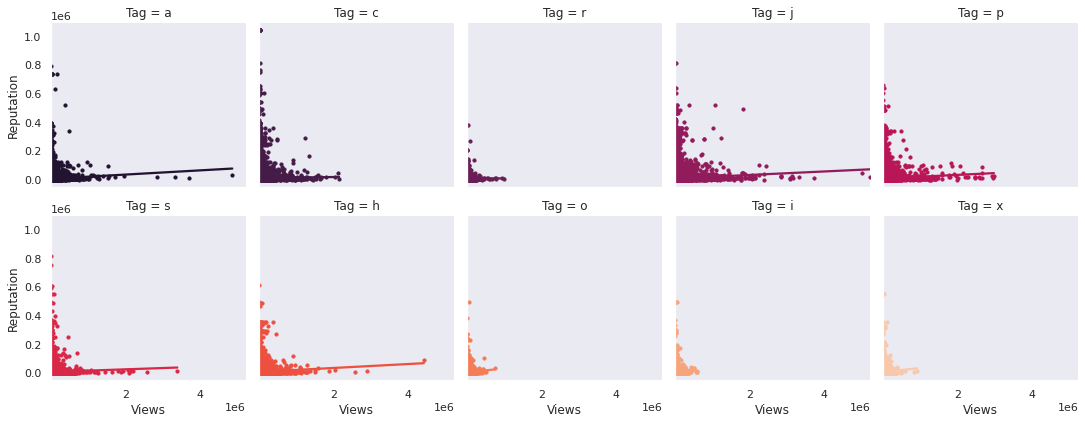

In [ ]:
#Correlation between Views and Reputation across Tag
sns.set(font_scale=1.0,style="dark")
sns.lmplot(x="Views",y="Reputation",data=data, col="Tag", col_wrap=5, ci=None, palette="rocket", hue="Tag" , height=3, scatter_kws={"s": 10, "alpha": 1})
plt.show()

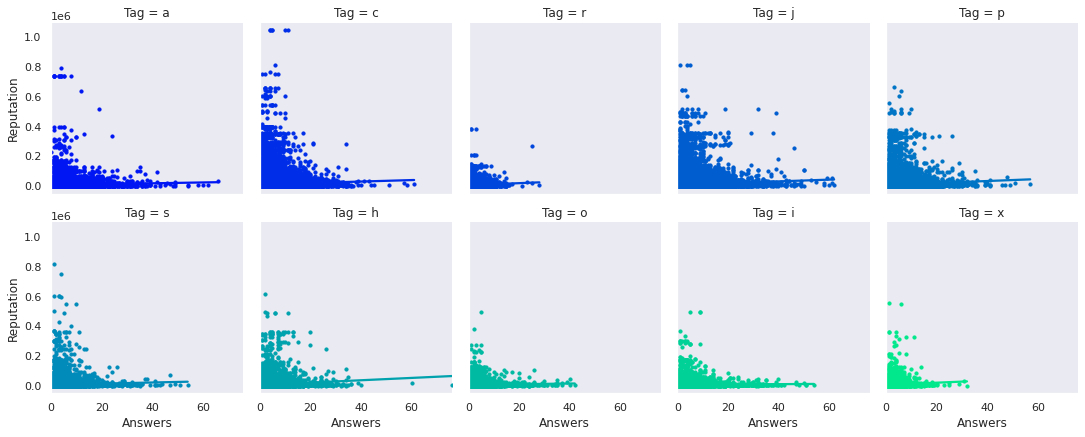

In [ ]:
#Correlation between Answers and Reputation across Tag
sns.set(font_scale=1.0,style="dark")
sns.lmplot(x="Answers",y="Reputation",data=data, col="Tag", col_wrap=5, ci=None, palette="winter", hue="Tag" , height=3, scatter_kws={"s": 10, "alpha": 1})
plt.show()

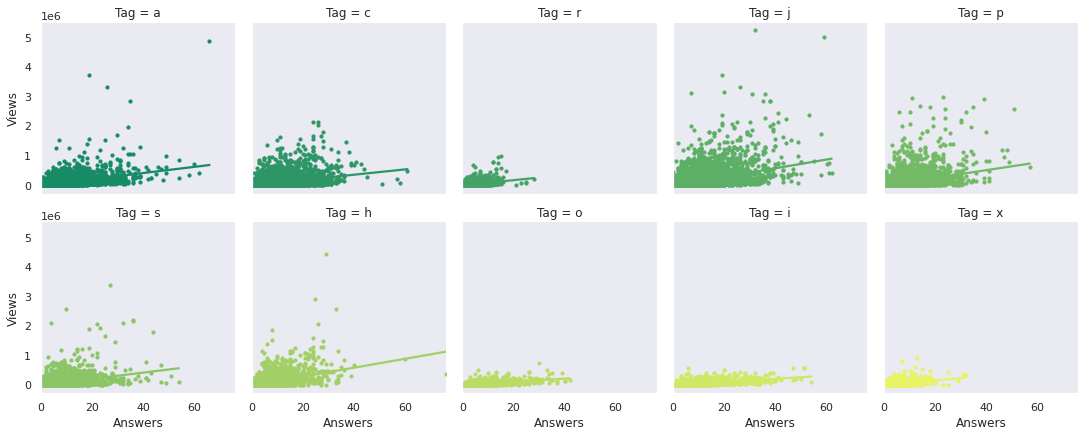

In [ ]:
#Correlation between Answers and Views across Tag
sns.set(font_scale=1.0,style="dark")
sns.lmplot(x="Answers",y="Views",data=data, col="Tag", col_wrap=5, ci=None, palette="summer", hue="Tag" , height=3, scatter_kws={"s": 10, "alpha": 1})
plt.show()

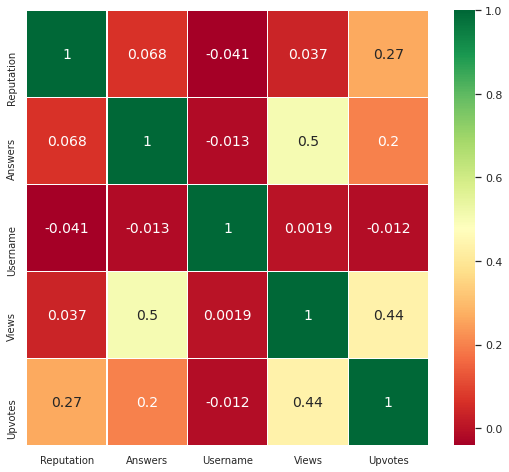

In [ ]:
#Lets do a correlation plot for entire dataframe
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':14})
fig=plt.gcf()
fig.set_size_inches(9,8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

* Views are aving highest correlation of 0.44 followed by Reputation 0.27 and Answers 0.2 against Upvotes
* Avswers and Views are having high correlation of 0.5
* Username column has very low correation of -0.012 with Upvotes and can be dropped

Take backup of data

In [ ]:
df_backup = df.copy()

Feature Engineering

In [ ]:
#Tag -
Tag_dict = {'a':0, 'c':1,'h':2,'i':3,'j':4,'o':5,'p':6,'r':7,'s':8,'x':9}

# Transform categorical variable Tag to numbers
data["Tag"] = data["Tag"].apply(lambda x: Tag_dict[x])
test["Tag"] = test["Tag"].apply(lambda x: Tag_dict[x])

#Convert 'Tag' to object
data['Tag']  = data['Tag'].astype('object')
test['Tag']  = test['Tag'].astype('object')

In [ ]:
############ Creating a Count Column for Tag & Username caetgory #################
data["Tag_Count"] = data.groupby(['Tag'])['Tag'].transform('count')
Tag_Count_dict = data.groupby(['Tag']).size().to_dict()
test['Tag_Count'] = test['Tag'].apply(lambda x:Tag_Count_dict.get(x,0))


data["Username_Count"] = data.groupby(['Username'])['Username'].transform('count')
Username_Count_dict = data.groupby(['Username']).size().to_dict()
test['Username_Count'] = test['Username'].apply(lambda x:Username_Count_dict.get(x,0))


In [ ]:
##### Creating 25percentile and 75percentile columns on Upvotes feature  ########################

### Tag
Tag_25p_dict = data.groupby(['Tag'])['Upvotes'].apply(lambda x:np.percentile(x,25)).to_dict()
data['Tag_25PercPrice'] = data['Tag'].apply(lambda x:Tag_25p_dict.get(x,0))
test['Tag_25PercPrice'] = test['Tag'].apply(lambda x:Tag_25p_dict.get(x,0))

Tag_75p_dict = data.groupby(['Tag'])['Upvotes'].apply(lambda x:np.percentile(x,75)).to_dict()
data['Tag_75PercPrice'] = data['Tag'].apply(lambda x:Tag_75p_dict.get(x,0))
test['Tag_75PercPrice'] = test['Tag'].apply(lambda x:Tag_75p_dict.get(x,0))


In [ ]:
#Creating a Count Column for Views & Answers caetgory 
data["Views_Count"] = data.groupby(['Views'])['Views'].transform('count')
Views_Count_dict = data.groupby(['Views']).size().to_dict()
test['Views_Count'] = test['Views'].apply(lambda x:Views_Count_dict.get(x,0))

data["Answers_Count"] = data.groupby(['Answers'])['Answers'].transform('count')
Answers_Count_dict = data.groupby(['Answers']).size().to_dict()
test['Answers_Count'] = test['Answers'].apply(lambda x:Answers_Count_dict.get(x,0))

In [ ]:
#seperating the dependant variable 
train_y = data["Upvotes"]
data.drop(["Upvotes"], axis=1, inplace=True)
#Lets drop ID column
data.drop('ID', axis = 1, inplace = True)
test.drop('ID', axis = 1, inplace = True)

In [ ]:
#Create primary and secondary list of columns
primary_list   = ['Tag', 'Reputation', 'Answers', 'Username', 'Views','Tag_Count','Username_Count','Views_Count','Answers_Count']
secondary_list = ['Tag_25PercPrice', 'Tag_75PercPrice',]

In [ ]:
#model 1 dataframe
train1 = data[primary_list+secondary_list]
test1  = test[primary_list+secondary_list]

In [ ]:
#Shape of train and test
print('There are {} rows and {} columns in train'.format(train1.shape[0],train1.shape[1]))
print('There are {} rows and {} columns in test'.format(test1.shape[0],test1.shape[1]))


There are 330045 rows and 11 columns in train
There are 141448 rows and 11 columns in test


Model building starts

In [ ]:
#Creating train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train1.values, train_y.values, test_size = 0.2, random_state = 7)

After several permutaion and combination, I decided to use xgbregressor to predict which gave nest results

In [ ]:
#XGBoost Regressor
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor(n_estimators=100, learning_rate=0.05,)

# Train the model using the training sets 
reg.fit(X_train, y_train,early_stopping_rounds=5,eval_set=[(X_test, y_test)], verbose=0)

[12:03:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
reg.score(X_test, y_test)

0.8319254631146566

In [ ]:
'''from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=10,random_state = 1)
adaboost.fit(X_train,y_train)
adaboost.score(X_test, y_test)'''

'from sklearn.ensemble import AdaBoostClassifier\nadaboost = AdaBoostClassifier(n_estimators=10,random_state = 1)\nadaboost.fit(X_train,y_train)\nadaboost.score(X_test, y_test)'

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)# Train the model on training data
rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
rf.score(X_test, y_test)

0.8439834989102906